In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

nutrients = pd.read_csv('nutrients.csv')
nutrients.head()



,Name,Energy,Protein,Fat,Calcium,Iron
0,Braised beef,340,20,28,9,2.6
1,Hamburger,245,21,17,9,2.7
2,Roast beef,420,15,39,7,2.0
3,Beefsteak,375,19,32,9,2.6
4,Canned beef,180,22,10,17,3.7


In [25]:
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets, preprocessing, metrics
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

/Users/trentyu/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [26]:
df = pd.read_csv("nutrients.csv")

In [29]:
print(df['Name'].value_counts())
df.head(5)

Braised beef           1
Veal cutlet            1
Canned tuna            1
Canned sardines        1
Canned salmon          1
Fried perch            1
Canned mackerel        1
Broiled mackerel       1
Fried haddock          1
Canned crabmeat        1
Canned clams           1
Raw clams              1
Baked bluefish         1
Beef tongue            1
Hamburger              1
Pork simmered          1
Pork roast             1
Smoked ham             1
Roast lamb shoulder    1
Roast lamb leg         1
Beef heart             1
Canned chicken         1
Broiled chicken        1
Canned beef            1
Beefsteak              1
Roast beef             1
Canned shrimp          1
Name: Name, dtype: int64


,Name,Energy,Protein,Fat,Calcium,Iron
0,Braised beef,340,20,28,9,2.6
1,Hamburger,245,21,17,9,2.7
2,Roast beef,420,15,39,7,2.0
3,Beefsteak,375,19,32,9,2.6
4,Canned beef,180,22,10,17,3.7


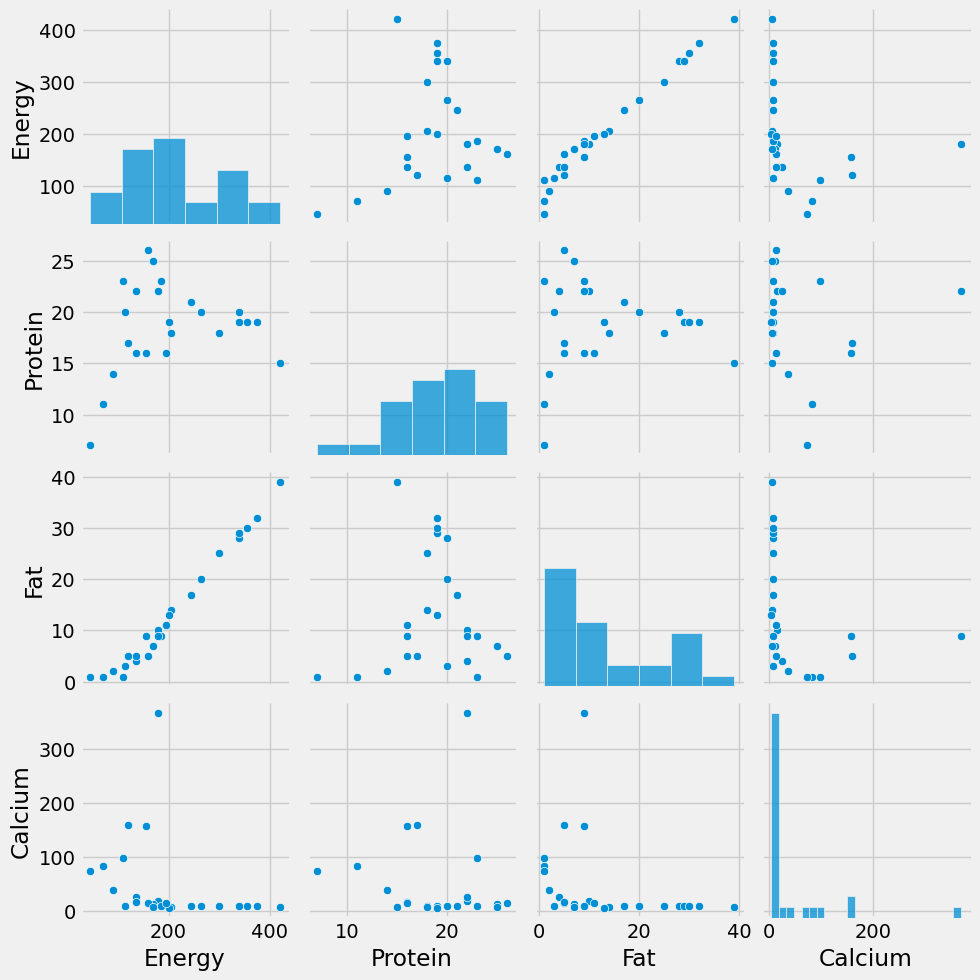

In [30]:
cols = df.columns[:-1]
sns.pairplot(df[cols])

In [36]:
df[cols].dtypes

Name       object
Energy      int64
Protein     int64
Fat         int64
Calcium     int64
dtype: object

In [45]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Assuming 'CategoricalColumn' is the name of the column containing categorical values
categorical_column = 'Name'

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the categorical column
df[categorical_column] = label_encoder.fit_transform(df[categorical_column])

# Assuming 'cols' contains the columns you want to scale
X_scaled = MinMaxScaler().fit_transform(df[cols])

In [46]:
pd.DataFrame(X_scaled, columns=cols).describe()

,Name,Energy,Protein,Fat,Calcium
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,0.500000,0.433086,0.631579,0.328460,0.107632
std,0.305279,0.269887,0.223773,0.296238,0.215564
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.240000,0.500000,0.105263,0.011050
50%,0.500000,0.360000,0.631579,0.210526,0.011050
75%,0.750000,0.633333,0.789474,0.565789,0.073204
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)

KMeans(n_clusters=2)

In [49]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_



0.3759346315168677

In [51]:
silhouette_score = metrics.silhouette_score(X_scaled, labels, metric='euclidean')

In [54]:
print("silhouette score:",silhouette_score)
print("inertia:",inertia)

silhouette score: 0.3759346315168677
inertia: 5.245792588183884


In [55]:
df['label'] = labels
df.head()

,Name,Energy,Protein,Fat,Calcium,Iron,label
0,4,340,20,28,9,2.6,1
1,18,245,21,17,9,2.7,1
2,22,420,15,39,7,2.0,1
3,3,375,19,32,9,2.6,1
4,7,180,22,10,17,3.7,0


In [60]:
cols = df.columns[:-2]
sns.pairplot(df, x_vars=cols, y_vars= cols, hue='label')

In [58]:
sns.pairplot(df, x_vars=cols, y_vars= cols, hue='Name')

In [61]:
#Practice Question 1

Repeat the above exercise for different values of k(=2)

Question 1. How do the inertia and silhouette scores change?

Ans--> The inertia and silhouette decrease as the K increases.

Quesetion 2. What if you don't scale your features?
Ans --> it can lead to biased results and might affect the performance of the clustering algorithm. 

Question 3. Is there a 'right' k? Why or why not?
Ans --> There is no a ‘right’k it depends on the characteristics of the data and the goals of the analysis
